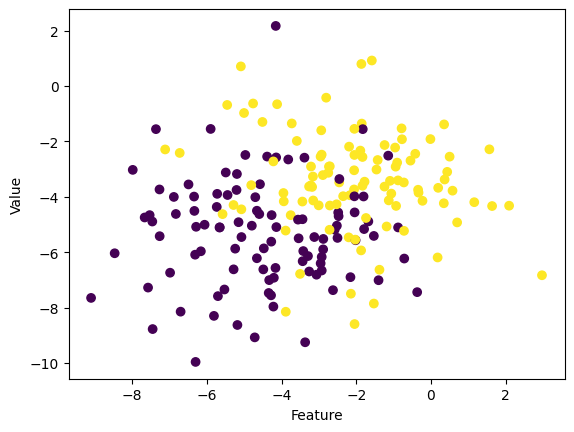

In [ ]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
# dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart.csv')
# X = dataset.iloc[:, [0,7]].values
# Y = dataset.iloc[:, 13].values
# llim=30
# ulim=80

from sklearn.datasets import make_blobs
X,Y =make_blobs(n_samples=200,centers=2,cluster_std=1.8)
llim=-10
ulim=10

n_samples=X.shape[0]
ones=np.ones((n_samples,1))
X=np.hstack((ones,X))

#Reshaping Dataset and label

Y=Y.reshape(n_samples,1)

plt.scatter(X[:,1],X[:,2],c=Y)
plt.xlabel("Feature")
plt.ylabel("Value")
plt.show()

# Splitting into test and train

In [ ]:
def test_train_split(data,target,split_perc):
  perm=np.random.permutation(len(data)) #to get random permutation of 0 to len-1
  x_shuff=data[perm]    #obtain shuffled data
  y_shuff=target[perm]    #obtain shuffled targets
  #get the index till which data is in train set
  n=round((((100-split_perc)*0.01))*len(data)) #round is used to round off to the nearest integer
  x_train=x_shuff[:n] #take starting n elements of shuffled data
  y_train=y_shuff[:n]
  x_test=x_shuff[n:] #take remaining elements of shuffled data
  y_test=y_shuff[n:]
  return x_train, y_train, x_test, y_test

x_train,y_train,x_test,y_test=test_train_split(X,Y,20)

In [ ]:
def sigmoid(z):
    z=np.float128(z)
    return 1/(1 + np.exp(-z))

def gd(X,y,learnrate):
    weights = np.ones((X.shape[1],1))


    for i in range(10000):
        y_pred = sigmoid(X.dot(weights))
        y_pred=y_pred.reshape(X.shape[0],1)
        weights+= (learnrate*(X.T.dot(y-y_pred) /X.shape[0])).reshape(X.shape[1],1)
    return weights

weights= gd(x_train,y_train,0.1)
print(weights)

[[-9.24252246]
 [-1.3085496 ]
 [-1.10587832]]


w0+w1x1+w2x2=0

x2=-w0/w2-(w1/w2)x2

In [ ]:
slope=-weights[1]/weights[2]
inter=-weights[0]/weights[2]
xline = np.linspace(llim,ulim,100)
yline = slope*xline + inter

plt.scatter(X[:,1],X[:,2],c=Y)
plt.plot(xline,yline,color='red')
plt.xlabel("Feature")
plt.ylabel("Value")
plt.show()

NameError: name 'weights' is not defined

In [ ]:
def predict(X,weights):
        linear_model = np.dot(X, weights)
        y_predicted = sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

def testerror(y_pred,Y):
  out=0
  for i in range(Y.shape[0]):
    out+= (y_pred[i]-Y[i])**2
  return out/Y.shape[0]

y_pred=predict(x_test,weights)
print(testerror(y_pred,y_test))


[0.]
